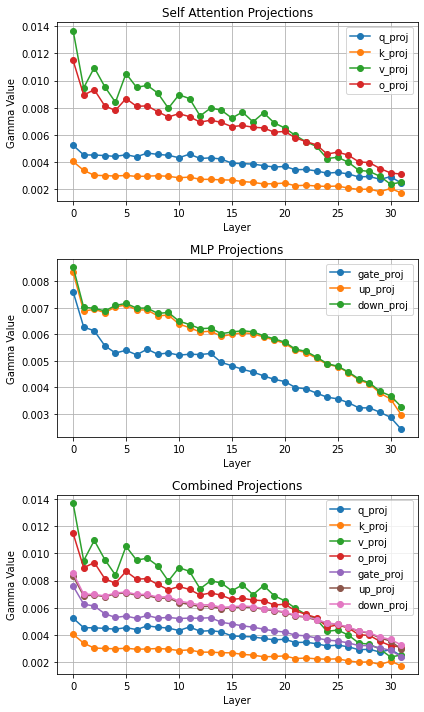

In [6]:
import re
import matplotlib.pyplot as plt
import pandas as pd
# import ace_tools as tools;

# Read the file
file_path = './gamma_1e2'
with open(file_path, 'r') as file:
    lines = file.readlines()

# Parse the data
data = []
for line in lines:
    match = re.match(r'base_model\.model\.model\.layers\[(\d+)\]\.(self_attn|mlp)\.(\w+_proj): (\d+\.\d+)', line.strip())
    if match:
        layer = int(match.group(1))
        projection_type = match.group(2)
        projection = match.group(3)
        gamma_value = float(match.group(4))
        data.append((layer, projection_type, projection, gamma_value))

# Convert to DataFrame
gamma_df = pd.DataFrame(data, columns=['Layer', 'Type', 'Projection', 'Gamma'])

# Display the dataframe to the user for confirmation
# tools.display_dataframe_to_user(name="Gamma Values Data", dataframe=gamma_df)

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(6, 10))

# Filter data for self attention and MLP projections
self_attn_data = gamma_df[gamma_df['Type'] == 'self_attn']
mlp_data = gamma_df[gamma_df['Type'] == 'mlp']

# Self Attention Projections
for proj in self_attn_data['Projection'].unique():
    subset = self_attn_data[self_attn_data['Projection'] == proj]
    axs[0].plot(subset['Layer'], subset['Gamma'], label=proj, marker='o')
axs[0].set_title('Self Attention Projections')
axs[0].set_xlabel('Layer')
axs[0].set_ylabel('Gamma Value')
axs[0].legend()
axs[0].grid(True)

# MLP Projections
for proj in mlp_data['Projection'].unique():
    subset = mlp_data[mlp_data['Projection'] == proj]
    axs[1].plot(subset['Layer'], subset['Gamma'], label=proj, marker='o')
axs[1].set_title('MLP Projections')
axs[1].set_xlabel('Layer')
axs[1].set_ylabel('Gamma Value')
axs[1].legend()
axs[1].grid(True)

# Combined Plot
for proj in gamma_df['Projection'].unique():
    subset = gamma_df[gamma_df['Projection'] == proj]
    axs[2].plot(subset['Layer'], subset['Gamma'], label=proj, marker='o')
axs[2].set_title('Combined Projections')
axs[2].set_xlabel('Layer')
axs[2].set_ylabel('Gamma Value')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()
